In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install nbimporter

  Using cached nbimporter-0.3.4-py3-none-any.whl.metadata (252 bytes)
Using cached nbimporter-0.3.4-py3-none-any.whl (4.9 kB)


In [3]:
import nbimporter
import imports

In [4]:
state_data = imports.create_state_data()

In [5]:
state_data.head()

,state,total_area,land_area,water_area,ANSI,1960,1970,1980,1990,2000,2010,2020
0,Alaska,665384,570641,94743,AK,226167,300382,401851,550043,626932,710231,733391
1,Texas,268596,261232,7365,TX,9579677,11196730,14229191,16986510,20851820,25145561,29145505
2,California,163695,155779,7916,CA,15717204,19953134,23667902,29760021,33871648,37253956,39538223
3,Montana,147040,145546,1494,MT,674767,694409,786690,799065,902195,989415,1084225
4,New Mexico,121590,121298,292,NM,951023,1016000,1302894,1515069,1819046,2059179,2117522


In [6]:
path = 'tornados_new.csv'
tornados = pd.read_csv(path)

In [7]:
fat_state = tornados.groupby('st').agg({'fat': 'sum'})

In [8]:
state_area = state_data[['ANSI','total_area']]

In [9]:
state_area.head()

,ANSI,total_area
0,AK,665384
1,TX,268596
2,CA,163695
3,MT,147040
4,NM,121590


In [10]:
fatality = fat_state.merge(state_area, left_index=True, right_on='ANSI', how='left').reset_index()

In [11]:
fatality['fatPer10ksqmi'] = fatality['fat'] / fatality['total_area'] * 10000

In [12]:
fatality = fatality.sort_values(by='fatPer10ksqmi', ascending=False).drop('index', axis=1)
fatality.head()

,fat,ANSI,total_area,fatPer10ksqmi
43,592,TN,42144,140.470767
10,303,GA,59425,50.988641
1,267,AL,52420,50.934758
25,205,MS,48432,42.327387
24,265,MO,69707,38.016268


In [13]:
fatality.iloc[0:10]

,fat,ANSI,total_area,fatPer10ksqmi
43,592,TN,42144,140.470767
10,303,GA,59425,50.988641
1,267,AL,52420,50.934758
25,205,MS,48432,42.327387
24,265,MO,69707,38.016268
17,127,KY,40408,31.429420
36,179,OK,69899,25.608378
2,112,AR,53179,21.060945
9,94,FL,65758,14.294839
51,26,WV,24230,10.730499


In [14]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

<AxesSubplot: xlabel='ANSI', ylabel='fatPer10ksqmi'>

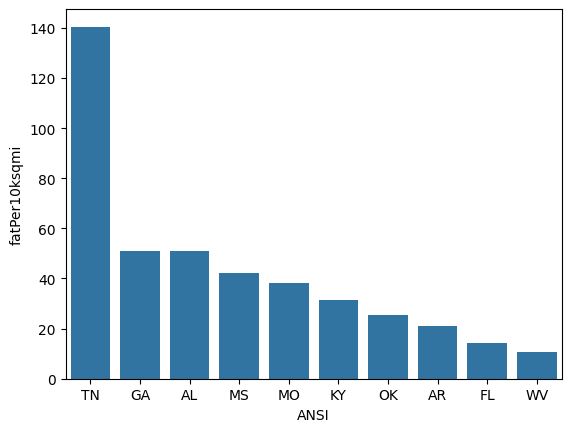

In [15]:
sns.barplot(data = fatality.iloc[0:10], x = 'ANSI', y = 'fatPer10ksqmi')

In [16]:
state_area_pop_2020 = state_data[['ANSI','total_area', '2020']]

In [36]:
new = fat_state.merge(state_area_pop_2020, left_index=True, right_on='ANSI', how='left').reset_index()

In [37]:
new['2020'] = new['2020'].astype(int)

In [38]:
new['fatPer10ksqmi'] = new['fat'] / new['total_area'] * 10000
new['fatPer100kppl'] = new['fat'] / new['2020'] * 100000

In [39]:
new = new.sort_values(by='fatPer100kppl', ascending=False).drop('index', axis=1)
new.head()

,fat,ANSI,total_area,2020,fatPer10ksqmi,fatPer100kppl
43,592,TN,42144,6910840,140.470767,8.566252
25,205,MS,48432,2961279,42.327387,6.922684
1,267,AL,52420,5024279,50.934758,5.314195
36,179,OK,69899,3959353,25.608378,4.520941
24,265,MO,69707,6154913,38.016268,4.305504


<AxesSubplot: xlabel='ANSI', ylabel='fatPer100kppl'>

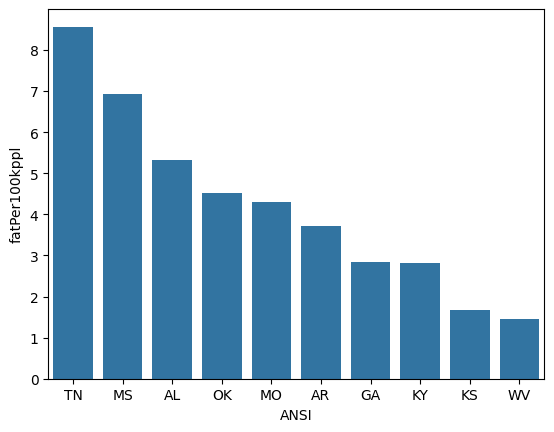

In [40]:
sns.barplot(data = new.iloc[0:10], x = 'ANSI', y = 'fatPer100kppl')

The above graph isn't great because it doesn't account for fatalities per event per year.  This is gonna be something to fix in a futher dataframe.  However, it does show that the general logic can be done.  All we'd need to do is probably put this in a function and tada, that's all we need.